### Import

In [2]:
# PyTorch
import torch
from torch import optim
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader, random_split

# Numpy
import numpy as np

# Plot
import matplotlib.pyplot as plt


# User-Defined Class
from model import ml, qml
from trainer import trainer

%matplotlib inline


### Data 생성

In [2]:
# 데이터 생성
num_data = 20000  # 총 데이터 개수
batch_size = 128  # 배치 크기

# 입력 데이터 생성 (0부터 2π 사이의 값)
x_data = torch.rand(num_data, 1) * 2 * torch.pi  # (20000, 1) shape로 생성
y_data =1/(2*torch.pi)*x_data  # sin 함수로 출력 생성 (20000, 1)

# 텐서 데이터셋 생성
dataset = TensorDataset(x_data, y_data)

# Train/Test set 분할 (80%/20% 비율)
train_size = int(0.8 * num_data)
test_size = num_data - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 배치 예시 출력
x_batch, y_batch = next(iter(train_loader))
print("Example batch x:", x_batch.shape)  # Expected: [128, 1]
print("Example batch y:", y_batch.shape)  # Expected: [128, 1]


Example batch x: torch.Size([128, 1])
Example batch y: torch.Size([128, 1])


### function estimation 

In [3]:
model_qml = sin_qml(num_qubit=3, num_layer=3)
model_ml = sin_ml(num_layer=3)
trainer_qml = trainer(model_qml, train_loader=train_loader, test_loader=train_loader)
trainer_ml = trainer(model_ml, train_loader=train_loader, test_loader=train_loader)
trainer_qml.train(50)
trainer_ml.train(50)

100%|██████████| 50/50 [00:04<00:00, 11.16it/s]


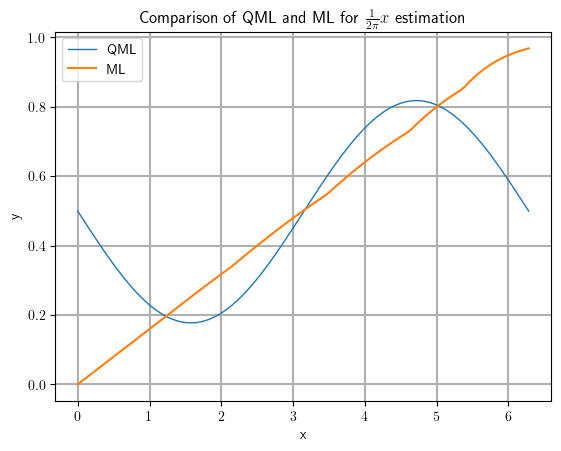

In [41]:
import matplotlib
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rc('text', usetex=True)

x = np.linspace(0, 2 * np.pi, 100)
x = torch.tensor(x.reshape(-1, 1)).to(torch.float32)
qml_pred=model_qml(x)
ml_pred =model_ml(x)
plt.phase_spectrum
# plt.plot(x, np.sin(x), label='sin', linewidth=10, alpha =0.4)
plt.plot(x,qml_pred.detach().numpy() , label=f'QML' ,linewidth=1 )
plt.plot(x, ml_pred.detach().numpy(),label=f'ML')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Comparison of QML and ML for $\frac{1}{2\pi}x$ estimation')
plt.legend()
plt.grid(True, linewidth=1.5)
plt.show()
